In [3]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
import pandas as pd

C:\Users\aninh\AppData\Local\Temp\ipykernel_10020\728832357.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [86]:
import matplotlib

In [87]:
matplotlib.__version__

'3.8.3'

In [5]:
df = pd.read_csv("Ghibli characters.csv")

In [36]:
time = df[['movie','release date']].drop_duplicates()
time["Level"] = [np.random.randint(-6,-2) if (i%2)==0 else np.random.randint(2,6) for i in range(len(time))]
time["release date"] = pd.to_datetime(df['release date'], format="%Y")

In [41]:
time

,movie,release date,Level
0,My Neighbor Totoro,1988-01-01,-3
1,Spirited Away,2001-01-01,5
3,Princess Mononoke,1997-01-01,-5
7,Kiki's Delivery Service,1989-01-01,2
9,Howl's Moving Castle,2004-01-01,-4
12,Nausicaä of the Valley of the Wind,1984-01-01,3
13,When Marnie Was There,2014-01-01,-3
15,Castle in the Sky,1986-01-01,4
17,Whisper of the Heart,1995-01-01,-4
19,The Cat Returns,2002-01-01,2


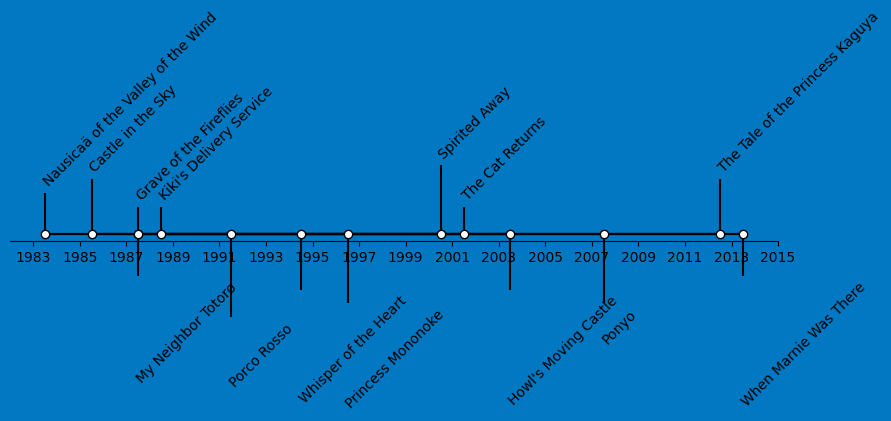

In [82]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")

ax.vlines(time['release date'], 0, time['Level'], color="black")  # The vertical stems.
ax.plot(time['release date'], np.zeros_like(time['release date']), "-o",
        color="black", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(time['release date'], time['Level'], time['movie']):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="left",rotation=45,
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", 0.5 ))



ax.margins(y=0.1)
ax.patch.set_facecolor('#0178C1')
fig.patch.set_facecolor('#0178C1')

plt.show()